In [1]:
import pandas as pd
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, mean_squared_error
from sklearn.model_selection import train_test_split

In [2]:
## load dataset
df_train = pd.read_excel('train.xlsx')
df_test = pd.read_excel('test.xlsx')


In [3]:


## checking the first five row train dataset
df_train.head()

,T1,T2,T3,T4,T5,T6,T7,T8,T9,T10,T11,T12,T13,T14,T15,T16,T17,T18,target
0,-70,-61,-66,-53,-51,-63,-82,-57,-76,-78,-66,-66,-61,-59,-73,-75,-63,-77,B37
1,-77,-74,-71,-76,-65,-63,-66,-52,-55,-75,-72,-75,-74,-61,-64,-63,-53,-63,B61
2,-53,-38,-55,-66,-62,-62,-65,-70,-62,-52,-56,-53,-66,-68,-72,-60,-68,-77,A19
3,-72,-62,-59,-65,-65,-65,-78,-82,-83,-59,-84,-60,-64,-83,-69,-72,-95,-73,A22
4,-67,-69,-65,-63,-59,-53,-70,-72,-71,-60,-61,-57,-54,-76,-61,-66,-71,-80,A33


In [4]:


## checking the first five row test dataset
df_test.head()

,T1,T2,T3,T4,T5,T6,T7,T8,T9,T10,T11,T12,T13,T14,T15,T16,T17,T18
0,-76,-83,-70,-66,-64,-72,-64,-69,-60,-76,-83,-78,-81,-81,-81,-70,-60,-60
1,-58,-57,-78,-81,-73,-73,-78,-78,-82,-49,-55,-58,-66,-79,-72,-83,-74,-80
2,-70,-70,-71,-69,-69,-68,-61,-55,-53,-82,-87,-76,-68,-57,-64,-75,-57,-70
3,-71,-61,-56,-56,-61,-60,-68,-66,-72,-58,-55,-56,-58,-62,-61,-59,-64,-65
4,-72,-71,-64,-69,-64,-63,-61,-42,-55,-61,-69,-67,-63,-63,-55,-49,-49,-57


In [5]:
## checking the shape of the dataset
print(f"Shape of Training dataset: {df_train.shape}")
print(f"Shape of Test dataset: {df_test.shape}")

Shape of Training dataset: (36752, 19)
Shape of Test dataset: (15752, 18)


In [6]:
## checking the data types of dataset
print(f'Data Type of training set: \n{df_train.dtypes}')

Data Type of training set: 
T1         int64
T2         int64
T3         int64
T4         int64
T5         int64
T6         int64
T7         int64
T8         int64
T9         int64
T10        int64
T11        int64
T12        int64
T13        int64
T14        int64
T15        int64
T16        int64
T17        int64
T18        int64
target    object
dtype: object


In [7]:
## checking the data types of dataset
print(f'Data Type of training set: \n{df_test.dtypes}')

Data Type of training set: 
T1     int64
T2     int64
T3     int64
T4     int64
T5     int64
T6     int64
T7     int64
T8     int64
T9     int64
T10    int64
T11    int64
T12    int64
T13    int64
T14    int64
T15    int64
T16    int64
T17    int64
T18    int64
dtype: object


In [8]:
## checking the null value in the dataset
df_train.isnull().sum()

T1        0
T2        0
T3        0
T4        0
T5        0
T6        0
T7        0
T8        0
T9        0
T10       0
T11       0
T12       0
T13       0
T14       0
T15       0
T16       0
T17       0
T18       0
target    0
dtype: int64

In [9]:
## checking the null value in the test dataset
df_test.isnull().sum()

T1     0
T2     0
T3     0
T4     0
T5     0
T6     0
T7     0
T8     0
T9     0
T10    0
T11    0
T12    0
T13    0
T14    0
T15    0
T16    0
T17    0
T18    0
dtype: int64

In [10]:
df_train['target'].unique()

array(['B37', 'B61', 'A19', 'A22', 'A33', 'A75', 'A41', 'B14', 'B80',
       'B64', 'A1', 'B21', 'A70', 'B57', 'B9', 'B50', 'B31', 'A21', 'B30',
       'A4', 'B40', 'B6', 'A64', 'A25', 'B18', 'A66', 'A53', 'B73', 'A50',
       'B25', 'A29', 'A35', 'A3', 'A46', 'B45', 'A36', 'B5', 'A79', 'A32',
       'B23', 'A7', 'A62', 'A71', 'A58', 'A9', 'B63', 'B51', 'B8', 'B36',
       'A14', 'A15', 'A24', 'B38', 'A10', 'B4', 'A37', 'A12', 'B41',
       'A17', 'B49', 'B71', 'B59', 'B39', 'B29', 'A76', 'B58', 'B28',
       'A77', 'A67', 'B24', 'A31', 'A34', 'A5', 'B34', 'A11', 'B16',
       'B20', 'A63', 'B53', 'A73', 'A44', 'A69', 'A56', 'A54', 'A55',
       'B11', 'A42', 'B22', 'B67', 'A74', 'A57', 'A8', 'B46', 'B15',
       'A51', 'A40', 'A59', 'A72', 'B32', 'A2', 'A13', 'B17', 'A65',
       'A52', 'A47', 'B47', 'B77', 'B3', 'B35', 'B44', 'A80', 'B43',
       'B54', 'B75', 'A49', 'B52', 'B33', 'B2', 'B1', 'A39', 'B7', 'A20',
       'A18', 'B12', 'A27', 'A6', 'A68', 'B72', 'B66', 'B69', 'A26',
   

In [11]:
## spliting the train dataset into input feature and target
X = df_train.drop('target', axis=1)
y = df_train['target']

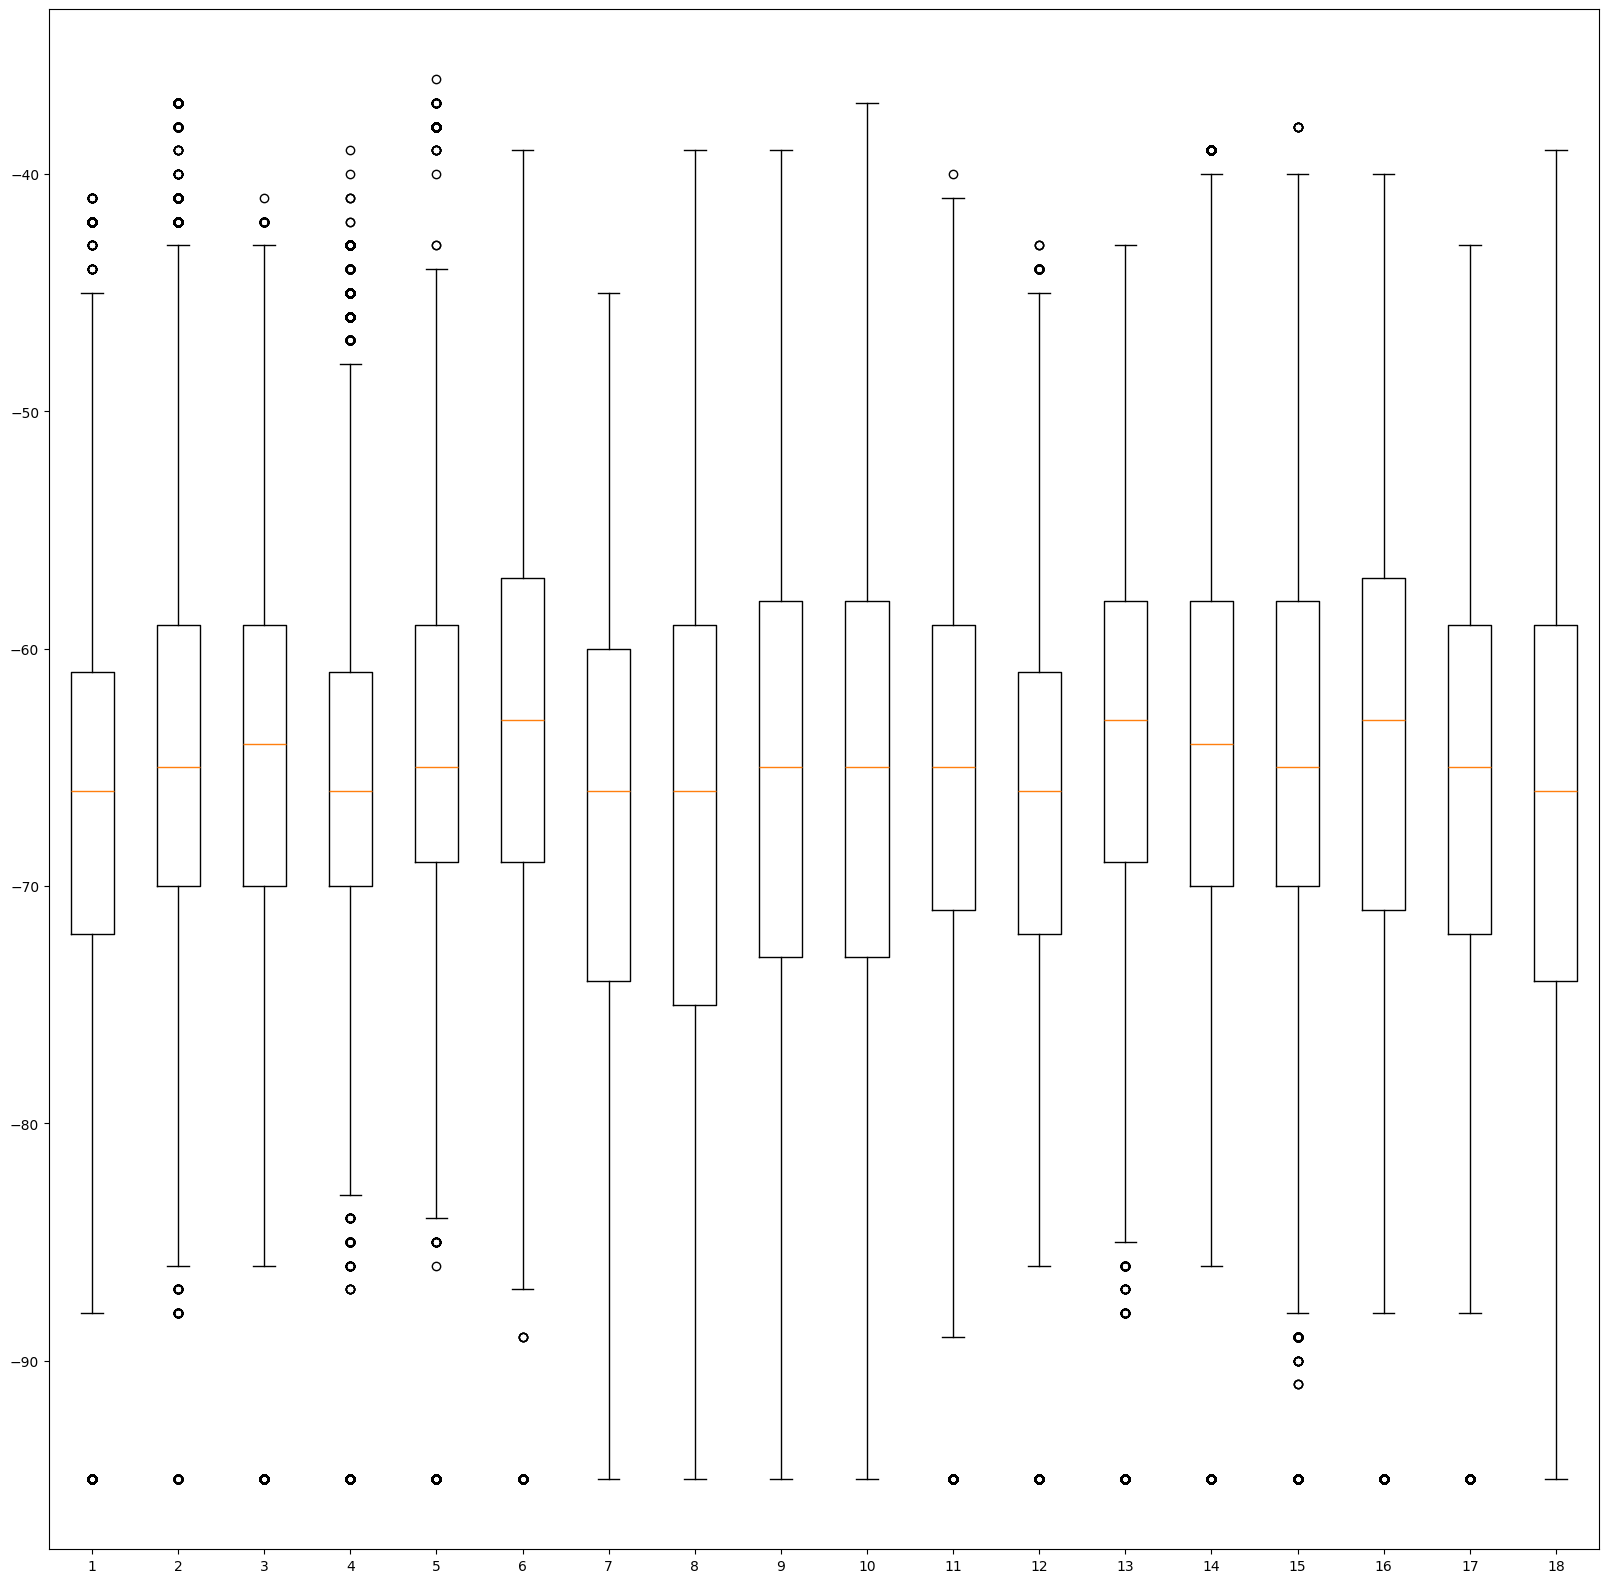

In [12]:
## checking outliers
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(20,20))
plt.boxplot(x=X)
plt.show()

In [13]:
## enncoding the categorical taget column
encoder = LabelEncoder()
y = encoder.fit_transform(y)

In [14]:
## splitting the train and test data
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.2, random_state=42)

In [15]:
print(f'X_train shape: {X_train.shape}')
print(f'X_test shape: {X_test.shape}')

X_train shape: (29401, 18)
X_test shape: (7351, 18)


In [16]:
## scaling the dataset
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [17]:
models={
    'RandomForestClassifier':RandomForestClassifier(),
    'DecisionTreeClassifier':DecisionTreeClassifier(),
    'SVC':SVC()
}

In [31]:
for model_name, model in models.items():
    model.fit(X_train_scaled, y_train)
    y_pred = model.predict(X_test_scaled)
    print(f'Model: {model_name}')
    print('----------------------------')
    print(f"{model_name} accuracy: {accuracy_score(y_test, y_pred)}")
    print('======================================================\n')
    

Model: RandomForestClassifier
----------------------------
RandomForestClassifier accuracy: 0.986260372738403

Model: DecisionTreeClassifier
----------------------------
DecisionTreeClassifier accuracy: 0.9669432730240783

Model: SVC
----------------------------
SVC accuracy: 0.9829955108148551



## Creation of the best model
I am choosing the RandomForestClassifier because it is having best accuracy score

In [20]:
rvc = RandomForestClassifier()

In [21]:
rvc.fit(X_train_scaled, y_train)

RandomForestClassifier()

In [22]:
y_pred = rvc.predict(X_test_scaled)

In [23]:
print(f'Accuracy Score: {accuracy_score(y_test, y_pred)}')

Accuracy Score: 0.986260372738403


## RandomForestClassifier is choosen because it is having best accuracy score

In [24]:
## saving the model_file
import pickle as pkl

## Scaler model
with open('scaler_clf.pkl','wb') as f:
    pkl.dump(scaler,f)

## enoder model
with open('encoder.pkl','wb') as f:
    pkl.dump(encoder,f)

## classification model
with open('rvc_model.pkl','wb') as f:
    pkl.dump(rvc,f)


In [25]:
import pickle as pkl
with open('scaler_clf.pkl','rb') as f:
   scaler= pkl.load(f)

## enoder model
with open('encoder.pkl','rb') as f:
    encoder =pkl.load(f)

## classification model
with open('rvc_model.pkl','rb') as f:
    rvc=pkl.load(f)

In [26]:
## preddictionon test dataset
df_test = pd.read_excel('test.xlsx')

In [27]:
df_test_scaled =scaler.transform(df_test)

In [32]:
y_pred =rvc.predict(df_test_scaled)

In [33]:
y_pred

array([151,   1, 141, ..., 145,  31,  78])

In [34]:
## saving the ouput file
df_test['Prediction'] = y_pred
df_test.to_excel('test_with_ouput.xlsx')